# Recommendation Systems (Assignment 8)

## Student: Rodolfo Lerma

This assignment, we focus on **content-based recommenders**.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

The data we use in this assignment is a movie meta-data that accompanies the user-movie rating data we used in the lecture. Let's take a look:

In [2]:
df_movies = pd.read_csv('./movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.shape

(9742, 3)

In [4]:
df_movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

As we see in the dataframe, there are 9742 rows/movies with 3 columns (`movield`, `title` & `genres`)

In [5]:
df_ratings = pd.read_csv('./ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_ratings.shape

(100836, 4)

The ratings dataframe contains 100,836 rows/ratings and 4 columns (`userId`,`movieId`,`rating`,`timestamp`)

### Question 1. Do some exploratory analysis of the data.  Please do at least 3 different analysis.  1 analysis/data exploration should be a visualization of some sort (bar, histogram, boxplot, etc.).

C:\Users\rodol\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


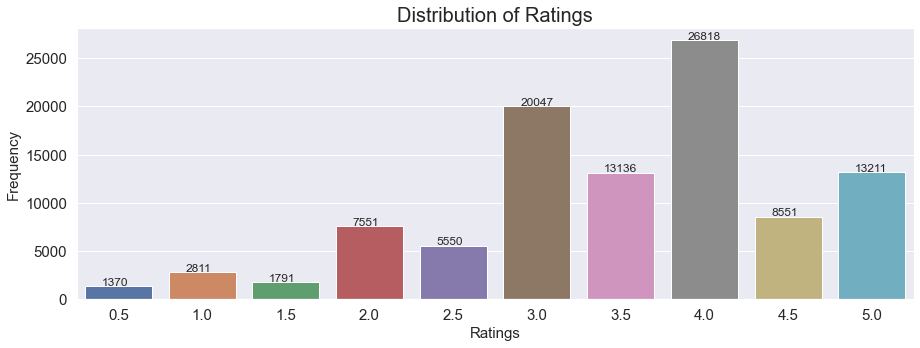

In [7]:
#Data Exploration 1
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

sns.countplot("rating", data=df_ratings, ax=axes)
for p in axes.patches:
    axes.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

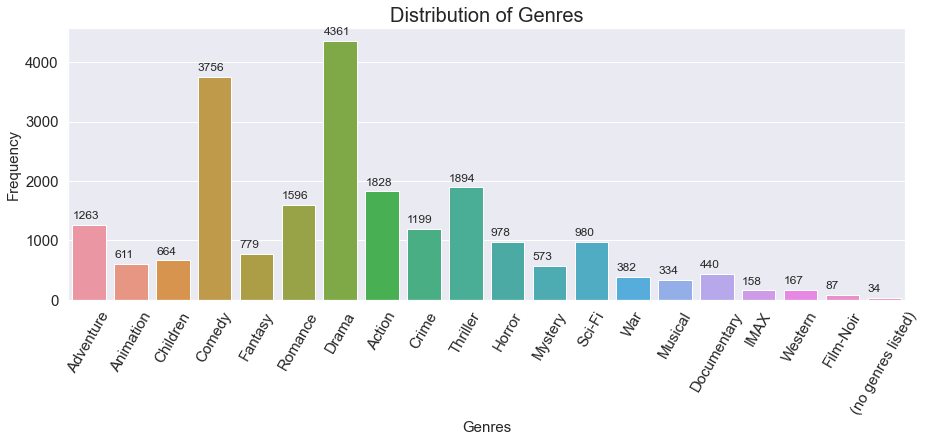

In [8]:
#Data Exploration 2
unique_genres = {}

def ExtractGenres(x):
    for g in x.split("|"):
        if g not in unique_genres.keys():
            unique_genres[g] = 1
        else:
            unique_genres[g] = unique_genres[g] + 1

df_movies["genres"].apply(ExtractGenres)

genres_df = pd.DataFrame(list(unique_genres.items()))
genres_df.columns = ["Genre", "Count"] 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

sns.barplot(y="Count", x="Genre", data=genres_df, ax=axes)
#axes.set_yticklabels([changingLabels(num) for num in axes.get_yticks()])
for p in axes.patches:
    axes.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()+100))

plt.tick_params(labelsize = 15)
plt.title("Distribution of Genres", fontsize = 20)
plt.xlabel("Genres", fontsize = 15)
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

In [9]:
#Data Exploration 3
df_ratings_copy = df_ratings.copy()
df_ratings_copy["timestamp"] = df_ratings_copy["timestamp"].apply(lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d"))
df_ratings_copy.loc[:, 'timestamp'] = pd.to_datetime(df_ratings_copy.loc[:, 'timestamp'])#df_ratings_copy.set_index('timestamp', inplace = True)
df_ratings_copy.set_index('timestamp', inplace = True)

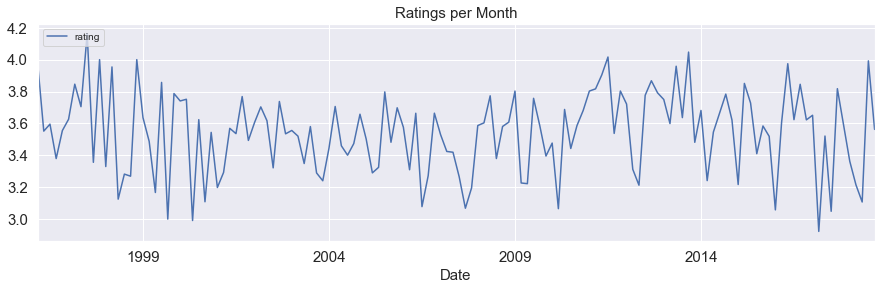

In [10]:
df_ratings_copy[["rating"]].resample("2M").mean().plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Ratings per Month',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

### Question 1.1: Since the `genres` column is not in the right format for us to do comparisons, create a dummy column for each genre. You can use the `str.get_dummies` method to do this.

In [11]:
df_dummies = df_movies['genres'].str.get_dummies()
df_dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_dummies.shape

(9742, 20)

In [13]:
df_movies = df_movies.join(df_dummies)
df_movies.drop(['genres'], axis = 1, inplace = True)

In [14]:
df_movies.shape

(9742, 22)

In [15]:
df_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Questioin 1.2: Validate Question 1.1 updates by displaying the genres list for the movie `Toy Story (1995)` as the reference movie. Hint: Drop the movieId and title column and transpose the data to make it easier to read.

In [16]:
movie_chosen = df_movies[df_movies['title'] == 'Toy Story (1995)']
movie_chosen.drop(['title', 'movieId'], axis = 1, inplace = True)
movie_chosen.transpose()

C:\Users\rodol\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0
(no genres listed),0
Action,0
Adventure,1
Animation,1
Children,1
Comedy,1
Crime,0
Documentary,0
Drama,0
Fantasy,1


### Question 1.3: Create a new `DataFrame` that will store the similarity scores. Hint: Copy df_movies for columns movieId and title.

In [17]:
df_sim = df_movies[['movieId', 'title']]
df_sim.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


### Question 2.1: Find all the movies similar to the above movie. The easiest way to do this is by using the `pd.DataFrame.corrwith` method. You can pass `movie_chosen` to this method and specify the correct value for `axis`. The default similarity metric used is Pearson's correlation, so add a new column to the `df_sim` data called `sim_pearson` to store the similarity scores. Show the top 5 rows of the resulting data.

In [18]:
movie_chosen.shape

(1, 20)

In [19]:
df_dummies.shape

(9742, 20)

In [20]:
df = pd.DataFrame([movie_chosen.iloc[0].tolist()]*(df_dummies.shape[0]), columns = df_dummies.columns.tolist())
df_sim['sim_pearson'] = df_dummies.corrwith(df, axis = 1)
df_sim.head()

<ipython-input-20-1cdb35af97ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['sim_pearson'] = df_dummies.corrwith(df, axis = 1)


,movieId,title,sim_pearson
0,1,Toy Story (1995),1.000000
1,2,Jumanji (1995),0.727607
2,3,Grumpier Old Men (1995),0.192450
3,4,Waiting to Exhale (1995),0.080845
4,5,Father of the Bride Part II (1995),0.397360


### Question 2.2: Pearson's correlation may not be the best similarity metric to use with the data we have, so try [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) instead. To specify another similarity function, we can use the `method` argument of `corrwith`. Unforetunately, Jaccard similarity is not one of the default metrics offered, but `method` also accepts functions (referred to as a "callable" in the doc).

- Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, using Jaccard similarity. Add the similarity scores to `df_sim` as a new column calld `sim_jaccard` and show the top 5 rows.

In [21]:
from sklearn.metrics import jaccard_score

df_sim['sim_jaccard'] = df_dummies.corrwith(df, method = jaccard_score, axis = 1)
df_sim.head()

<ipython-input-21-7d467bf9e179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['sim_jaccard'] = df_dummies.corrwith(df, method = jaccard_score, axis = 1)


,movieId,title,sim_pearson,sim_jaccard
0,1,Toy Story (1995),1.000000,1.000000
1,2,Jumanji (1995),0.727607,0.600000
2,3,Grumpier Old Men (1995),0.192450,0.166667
3,4,Waiting to Exhale (1995),0.080845,0.142857
4,5,Father of the Bride Part II (1995),0.397360,0.200000


### Question 2.3: Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, but this time use cosine similarity. Add the similarity scores to `df_sim` as a new column calld `sim_cosine` and show the top 5 rows. 

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

df_sim['sim_cosine'] = cosine_similarity(df_dummies, movie_chosen)
df_sim.head()

<ipython-input-22-02f389e45aab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['sim_cosine'] = cosine_similarity(df_dummies, movie_chosen)


,movieId,title,sim_pearson,sim_jaccard,sim_cosine
0,1,Toy Story (1995),1.000000,1.000000,1.000000
1,2,Jumanji (1995),0.727607,0.600000,0.774597
2,3,Grumpier Old Men (1995),0.192450,0.166667,0.316228
3,4,Waiting to Exhale (1995),0.080845,0.142857,0.258199
4,5,Father of the Bride Part II (1995),0.397360,0.200000,0.447214


We built a simple example of a recommender system above. Now let's make this more interesting by adding additional information to the above table that can help us filter the recommendations. Specifically, we want to be able to filter by the movie's popularity (number of users who rated it) and its average rating (average over users). This information is not part of the movie meta-data, so we have to turn to the data with the ratings. This makes it a basic example of a hybrid approach.

The code below will load the data and reshape it from long to wide using `pivot_table`:

In [23]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
df_ratings.shape

(100836, 4)

In [25]:
movie_user_mat = df_ratings.pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
movie_user_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
movie_user_mat.shape

(9724, 610)

We can notice that the ratings dataframe have **9724 movies** and only **610 users**. 

### Question 3.1: From the table above, extract the average rating of each movie and the number of ratings received by each movie. Add those as two new columns to `df_sim`, and call them `ratings_avg` and `ratings_cnt` respectively. Show the top 5 rows. 

In [27]:
df_sim.shape

(9742, 5)

Comparing the number of movies from the rating dataframe with the number of movies on the movies dataframe, we can see that there are more movies in the movie dataframe (around 18) than in the rating dataframe.

In [28]:
df_sim.set_index('movieId', inplace = True)

In [29]:
df_sim['ratings_avg'] = movie_user_mat.mean(axis = 1)
df_sim['ratings_cnt'] = movie_user_mat.count(axis = 1)
df_sim.head()

<ipython-input-29-a8a561a24b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['ratings_avg'] = movie_user_mat.mean(axis = 1)
<ipython-input-29-a8a561a24b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['ratings_cnt'] = movie_user_mat.count(axis = 1)


,title,sim_pearson,sim_jaccard,sim_cosine,ratings_avg,ratings_cnt
movieId,,,,,,
1,Toy Story (1995),1.000000,1.000000,1.000000,3.920930,215.0
2,Jumanji (1995),0.727607,0.600000,0.774597,3.431818,110.0
3,Grumpier Old Men (1995),0.192450,0.166667,0.316228,3.259615,52.0
4,Waiting to Exhale (1995),0.080845,0.142857,0.258199,2.357143,7.0
5,Father of the Bride Part II (1995),0.397360,0.200000,0.447214,3.071429,49.0


### Question 3.2: Now find all the movies that are similar to `Toy Story (1995)` using cosine similarity, just like we did earlier, but this time limit the results to movies in the bottom 40th percentile in terms of popularity (`ratings_cnt`) and the top 40th percentile in terms of average rating (`ratings_avg`). Show the top 5 rows.

In [30]:
less_known =  df_sim[df_sim['ratings_cnt'] < df_sim['ratings_cnt'].quantile(0.4)].index.tolist()
high_rating = df_sim[df_sim['ratings_avg'] > df_sim['ratings_avg'].quantile(0.6)].index.tolist()
list1_as_set = set(less_known)
intersection = list1_as_set.intersection(high_rating)

In [31]:
df_sim.loc[intersection].sort_values('sim_cosine', ascending = False).head()

,title,sim_pearson,sim_jaccard,sim_cosine,ratings_avg,ratings_cnt
movieId,,,,,,
91355,Asterix and the Vikings (Astérix et les Viking...,1.000000,1.000000,1.000000,5.0,1.0
92348,Puss in Boots (Nagagutsu o haita neko) (1969),0.881917,0.833333,0.912871,4.0,1.0
95313,Jack-Jack Attack (2005),0.866025,0.800000,0.894427,4.5,1.0
73804,Asterix at the Olympic Games (Astérix aux jeux...,0.866025,0.800000,0.894427,4.0,1.0
126921,The Fox and the Hound 2 (2006),0.866025,0.800000,0.894427,5.0,1.0


We can see the 5 first recommendations based on the set boundaries for this problem:

- `Asterix and the Vikings`
- `Puss in Boots`
- `Jack-Jack Attach`
- `Asterix at the Olympic Games`
- `The Fox and the Hound 2`

### [Bonus] Question 4: In the exercise above, we obtained similarity scores between `Toy Story (1995)` and all other movies. Perfomed all possible pairwise comparisons.  [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) & [squareform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html)

In [32]:
df_movies.shape

(9742, 22)

In [33]:
from scipy.spatial.distance import pdist, squareform

df = df_movies.set_index('movieId')
df.drop(columns = ['title','(no genres listed)'], inplace = True)

sim_mat = pdist(df, 'cosine')
print(len(sim_mat))

47448411


The 47,448,411 values comes from the all the pairwise combination of the 9742 elements as given by the formula:

pairwise_combinations = n! / (r!(n-r)!)

which in this case is: 9742! / (2!(9740!))  =  (9742 x 9741)/2 = 47,448,41

In [34]:
sim_mat = squareform(sim_mat)
print(sim_mat)

[[0.         0.22540333 0.68377223 ... 1.         0.68377223 0.5527864 ]
 [0.22540333 0.         1.         ... 1.         1.         1.        ]
 [0.68377223 1.         0.         ... 1.         1.         0.29289322]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [0.68377223 1.         1.         ... 1.         0.         1.        ]
 [0.5527864  1.         0.29289322 ... 1.         1.         0.        ]]


In [35]:
sim_mat_df = pd.DataFrame(sim_mat)
sim_mat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
0,0.000000,0.225403,0.683772,0.741801,0.552786,1.0,6.837722e-01,0.367544,1.0,0.741801,...,0.552786,0.683772,0.683772,0.552786,1.0,0.329180,0.225403,1.00000,0.683772,0.552786
1,0.225403,0.000000,1.000000,1.000000,1.000000,1.0,1.000000e+00,0.183503,1.0,0.666667,...,1.000000,1.000000,1.000000,1.000000,1.0,0.711325,0.666667,1.00000,1.000000,1.000000
2,0.683772,1.000000,0.000000,0.183503,0.292893,1.0,2.220446e-16,1.000000,1.0,1.000000,...,0.646447,1.000000,0.500000,1.000000,1.0,0.646447,0.591752,1.00000,1.000000,0.292893
3,0.741801,1.000000,0.183503,0.000000,0.422650,1.0,1.835034e-01,1.000000,1.0,1.000000,...,0.711325,0.591752,0.183503,1.000000,1.0,0.711325,0.666667,0.42265,1.000000,0.422650
4,0.552786,1.000000,0.292893,0.422650,0.000000,1.0,2.928932e-01,1.000000,1.0,1.000000,...,0.500000,1.000000,0.292893,1.000000,1.0,0.500000,0.422650,1.00000,1.000000,0.000000


### Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: 

This was my first experience working on recommendation systems, as mostly in the aerospace industry predictive models are for the most part the preference. It was great to have a better understanding of what I behind the curtains on the recommendations that I get at all the different platforms, for different type of entities such as: movies, songs, products, ads, etc. Another interesting part was looking at the different types of recommendation systems depending on the data available or the desired use for such recommendation, such as: collaborative recommendation systems, content-based & knowledge based. Regardless of the type of Regression System that someone may be working on, choosing the right similarity measure, which depends on the kind data one is dealing with as well as the goal for that particular system. 


It is clear by looking at the material and by worked on this assignment that creating a recommendation system at scale such as the ones seen at Amazon, Spotify, Walmart, etc is extremely complicated as the number of variables to take into account are incredible big, plus usually the number of datapoints are huge, but knowing the basics gives me a great idea of the importance of such systems.


Also, another very important topic discuss during the class is the dark side of recommendations systems as they get better and better it is seen that they seem to take from us ability to make decisions and can at times get us in the so-called “echo chambers” that can lead to social and economical problems as these services can limit our exposure to new ideas and/or products.
